In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [3]:
housing_data = pd.read_csv("housing_data.csv")  # housing_data load

In [14]:
print("Dataset Info:")
print(housing_data.info())


print("\nSample Data:")
print(housing_data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  

In [16]:
# Identify numeric and categorical columns
numeric_columns = housing_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = housing_data.select_dtypes(include=['object']).columns

# Handle Missing Values

In [18]:

# Impute numeric features with median
num_imputer = SimpleImputer(strategy='median')
housing_data[numeric_columns] = num_imputer.fit_transform(housing_data[numeric_columns])

# Impute categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
housing_data[categorical_columns] = cat_imputer.fit_transform(housing_data[categorical_columns])

# Verify missing values are handled
print("\nMissing Values Count:")
print(housing_data.isnull().sum())



Missing Values Count:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


# Feature Engineering

In [42]:
# Createing New Features

#  Total Square Footage (Including Basement)
housing_data['TotalSF'] = housing_data['TotalBsmtSF'] + housing_data['1stFlrSF'] + housing_data['2ndFlrSF']

#  Price Per Square Foot
housing_data['PricePerSF'] = housing_data['SalePrice'] / housing_data['TotalSF']

# House Age (Years since built)
current_year = 2024
housing_data['HouseAge'] = current_year - housing_data['YearBuilt']

# Age Since Last Remodel
housing_data['RemodelAge'] = current_year - housing_data['YearRemodAdd']

# Total Bathrooms (Full + Half Bathrooms)
housing_data['TotalBathrooms'] = housing_data['FullBath'] + (housing_data['HalfBath'] * 0.5)

# Interaction Feature: Quality and Living Area
housing_data['OverallQual_GrLivArea'] = housing_data['OverallQual'] * housing_data['GrLivArea']




In [44]:
# Display new feature columns
print("\nNew Feature Columns:")
print(housing_data[['TotalSF', 'PricePerSF', 'HouseAge', 'RemodelAge', 'TotalBathrooms', 'OverallQual_GrLivArea']].head())


New Feature Columns:
   TotalSF  PricePerSF  HouseAge  RemodelAge  TotalBathrooms  \
0   2566.0   81.254871      21.0        21.0             2.5   
1   2524.0   71.909667      48.0        48.0             2.0   
2   2706.0   82.594235      23.0        22.0             2.5   
3   2473.0   56.611403     109.0        54.0             1.0   
4   3343.0   74.783129      24.0        24.0             2.5   

   OverallQual_GrLivArea  
0                11970.0  
1                 7572.0  
2                12502.0  
3                12019.0  
4                17584.0  


# Visualize Feature Impact on House Prices

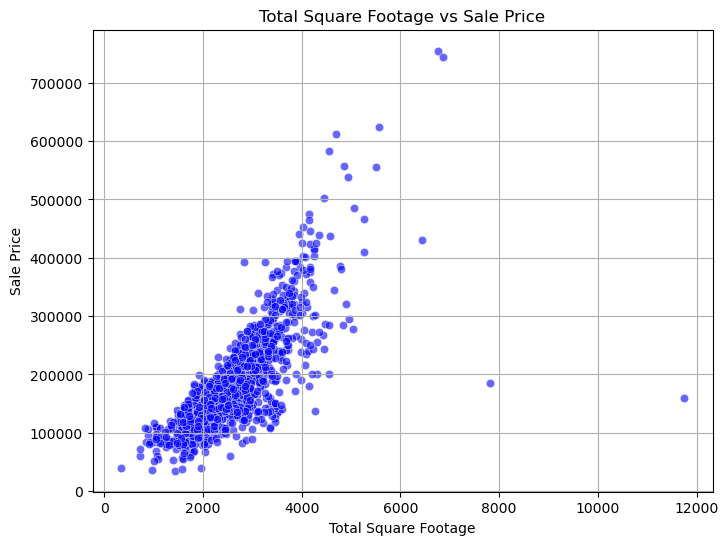

In [26]:
# Relationship between Square Footage and Sale Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housing_data['TotalSF'], y=housing_data['SalePrice'], alpha=0.6, color="blue")
plt.title("Total Square Footage vs Sale Price")
plt.xlabel("Total Square Footage")
plt.ylabel("Sale Price")
plt.grid(True)
plt.show()


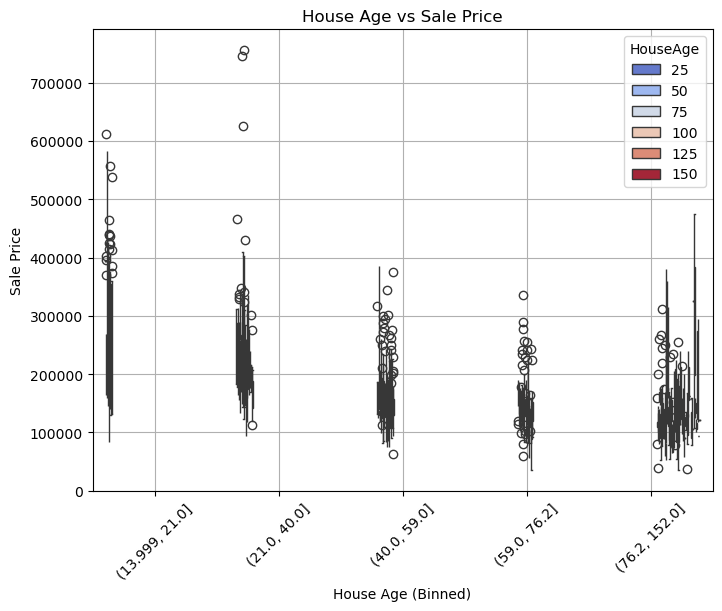

In [40]:
# Relationship between House Age and Sale Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=pd.qcut(housing_data['HouseAge'], q=5), y=housing_data['SalePrice'],hue=housing_data['HouseAge'], palette="coolwarm")
plt.title("House Age vs Sale Price")
plt.xlabel("House Age (Binned)")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


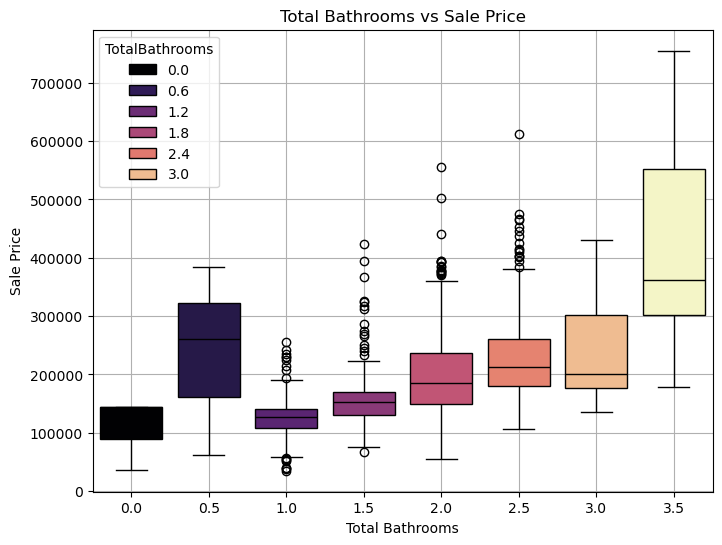

In [36]:
#Impact of Total Bathrooms on Sale Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing_data['TotalBathrooms'], y=housing_data['SalePrice'],  hue=housing_data['TotalBathrooms'],palette="magma")
plt.title("Total Bathrooms vs Sale Price")
plt.xlabel("Total Bathrooms")
plt.ylabel("Sale Price")
plt.grid(True)
plt.show()


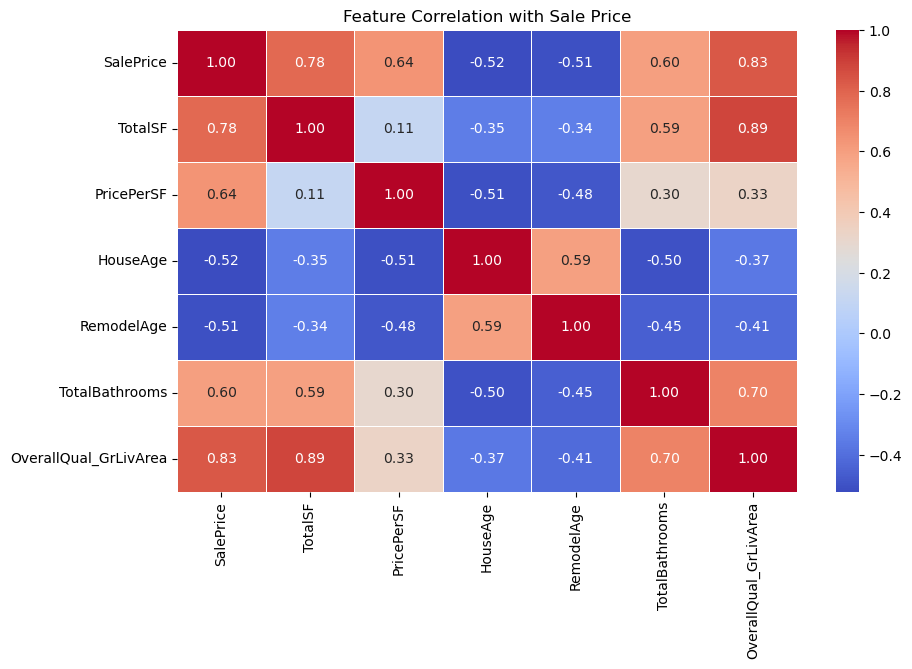

In [34]:
# Correlation Heatmap of Important Features
plt.figure(figsize=(10, 6))
correlation_matrix = housing_data[['SalePrice', 'TotalSF', 'PricePerSF', 'HouseAge', 'RemodelAge', 'TotalBathrooms', 'OverallQual_GrLivArea']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Sale Price")
plt.show()
